**Plot the effective AoA**

In [1]:
# Set the font family to Times New Roman
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 15

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'

Done!


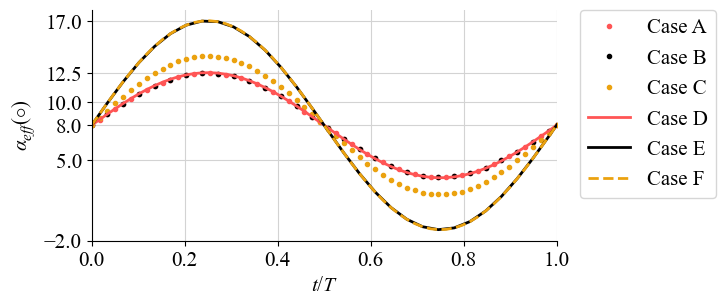

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse

cm2in = 1 / 2.54

# define sub-routines
def tand(angle):
    return np.tan(angle * np.pi / 180)

def atand(angle):
    return np.arctan(angle) * 180 / np.pi

def sind(angle):
    return np.sin(angle * np.pi / 180)

# PITCHING MOTION* * * * * * * * * * * * * * * * * * * * *

c = 0.2     # chord length, m
U = 0.3     # free-stream velocity, m/s
L = 0.12    # distance between the two stings, m
T = 1 / 0.19  # base period, s
T2 = 1 / 0.38
AoA = 8     # angle-of-attack, deg
t = np.linspace(0, 1 * T, num=60)  # time vector

# define parameters: case A * * * * * * * * * * * * * * * * * * * * *

f_A = 0.19  # base frequency, Hz
Amp_A = 4.5   # amplitude of the motion, deg
# amplitude of the tranverse motion
dh_A = (tand(AoA + Amp_A) - tand(AoA)) * L * np.sin(2 * np.pi * f_A * t)
# motion profile reconstructed from dh_A
alpha_eff_A = atand(dh_A / L + tand(AoA))
# reference, or ideal motion profile
alpha_eff_A = AoA + Amp_A * np.sin(2 * np.pi * f_A * t)

# define parameters: case B * * * * * * * * * * * * * * * * * * * * *
f_B = 0.38  # base frequency, Hz
Amp_B = 4.5   # amplitude of the motion, deg
# amplitude of the tranverse motion
dh_B = (tand(AoA + Amp_B) - tand(AoA)) * L * np.sin(2 * np.pi * f_B * t)
# motion profile reconstructed from dh_B
alpha_eff_B = atand(dh_B / L + tand(AoA))
# reference, or ideal motion profile
alpha_eff_B = AoA + Amp_B * np.sin(2 * np.pi * f_B * t)

# define parameters: case C * * * * * * * * * * * * * * * * * * * * *
f_C = 0.19  # base frequency, Hz
Amp_C = 6   # amplitude of the motion, deg
# amplitude of the tranverse motion
dh_C = (tand(AoA + Amp_C) - tand(AoA)) * L * np.sin(2 * np.pi * f_C * t)
# motion profile reconstructed from dh_C
alpha_eff_C = atand(dh_C / L + tand(AoA))
# reference, or ideal motion profile
alpha_eff_C = AoA + Amp_C * np.sin(2 * np.pi * f_C * t)

# define parameters: case D * * * * * * * * * * * * * * * * * * * * *
f_D = 0.19     # base frequency, Hz
Amp_D = 0.02   # amplitude of the motion, m
# amplitude of the tranverse motion
dh_D = Amp_D * np.sin(2 * np.pi * f_D * t - np.pi / 2)  # Modified phase
# motion profile reconstructed from dh_D; aEff = arctan( diff(h(t)) / v )
alpha_eff_D = AoA + atand((Amp_D * 2 * np.pi * f_D * np.cos(2 * np.pi * f_D * t - np.pi / 2)) / U)

# define parameters: case E * * * * * * * * * * * * * * * * * * * * *
f_E = 0.38  # base frequency, Hz
Amp_E = 0.02   # amplitude of the motion, m
# amplitude of the tranverse motion
dh_E = Amp_E * np.sin(2 * np.pi * f_E * t - np.pi / 2)  # Modified phase
# motion profile reconstructed from dh_E; aEff = arctan( diff(h(t)) / v )
alpha_eff_E = AoA + atand((Amp_E * 2 * np.pi * f_E * np.cos(2 * np.pi * f_E * t - np.pi / 2)) / U)

# define parameters: case F * * * * * * * * * * * * * * * * * * * * *
f_F = 0.19  # base frequency, Hz
Amp_F = 0.04   # amplitude of the motion, m
# amplitude of the tranverse motion
dh_F = Amp_F * np.sin(2 * np.pi * f_F * t - np.pi / 2)  # Modified phase
# motion profile reconstructed from dh_F; aEff = arctan( diff(h(t)) / v )
alpha_eff_F = AoA + atand((Amp_F * 2 * np.pi * f_F * np.cos(2 * np.pi * f_F * t - np.pi / 2)) / U)

# plot the results
fig, ax = plt.subplots(figsize=(6, 3))
plt.rcParams['font.family'] = 'Times New Roman'

ax.plot(t / T, alpha_eff_A, '.', color='#FF5555', label='Case A')
ax.plot(t * 2 / T, alpha_eff_B, '.', color='#000000', label='Case B')
ax.plot(t / T, alpha_eff_C, '.', color='#EBA20F', label='Case C')
ax.plot(t / T, alpha_eff_D, '-', color='#FF5555', linewidth=2, label='Case D')
ax.plot(t * 2 / T, alpha_eff_E, '-', color='#000000', linewidth=2, label='Case E')
ax.plot(t / T, alpha_eff_F, '--', color='#EBA20F', linewidth=2, label='Case F')

ax.set_xlabel('$t/T$')
ax.set_ylabel(r'$\alpha_{eff} (\circ)$')
ax.set_xlim([0, 1])
ax.set_ylim([-2, 18])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, ncol=1, fontsize=15)

ax.set_yticks([-2, 5, 8, 10, 12.5, 17])
# show light gray grid lines
ax.grid(color='lightgray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('./outputs/effective_AoA.png', bbox_inches='tight', dpi=350)

print('Done!')
